# Entrega 3

Presentado por: Juan Carlos Pérez B.

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

In [316]:
data = pd.read_csv('iris.data',names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [317]:
# Seleccion de las dos features
x1 = data['sepal_length']
x2 = data['petal_length']

cl = data['class']


In [318]:
class_0 = cl == 'Iris-setosa'
class_1 = cl != 'Iris-setosa'
class_2 = cl == 'Iris-versicolor'
class_3 = cl == 'Iris-virginica'
clb =class_0.astype(int)

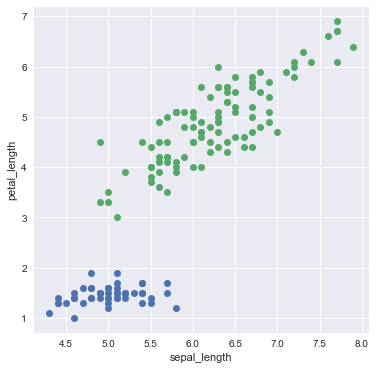

In [347]:
fig =plt.figure(figsize=(6,6))
plt.plot(x1[class_0],x2[class_0],'o',label='Iris-setosa')
plt.plot(x1[class_1],x2[class_1],'o',label='Otras')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

In [330]:
#-- Esta es la función que queremos encontrar
def y(x):
    return -(b + w_1*x)/w_2
#-- Definimos nuestra función de activación, en este caso usamos un Sigmoide
def act(z):
    return 1/(1 + np.exp(-z))

Epoch [1/10], bias: -0.5, w1: -3.5, w2: -2.35
Epoch [2/10], bias: 0.0, w1: -2.0, w2: -3.3000000000000003
Epoch [3/10], bias: 0.5, w1: -0.5, w2: -4.250000000000001
Epoch [4/10], bias: 0.5, w1: -0.8000000000000003, w2: -5.300000000000001
Epoch [5/10], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [6/10], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [7/10], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [8/10], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [9/10], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [10/10], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005


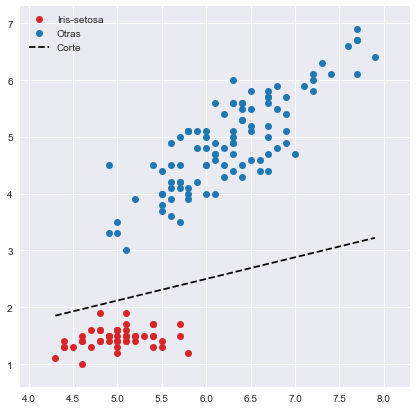

In [331]:
# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 10 # Número de épocas
n = 0.5 # Tasa de aprendizaje

# Entrenamos el Perceptron
for epoch in range(n_epochs):
    for i,j,k in zip(x1,x2,clb):
    
        # Función de Suma
        z = i*w_1 + j*w_2 + b

        # Función de Activación
        sig_z = act(z)

        # Evaluamos la salida (output)
        if sig_z >= 0.5:
            out = 1
        if sig_z < 0.5:
            out = 0

        # Calculamos el error
        error = k - out

        # Actualizamos los pesos
        b = b + n*error
        w_1 += n*error*i
        w_2 += n*error*j

    print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

fig = plt.figure(figsize=(7,7))
plt.plot(x1[class_0],x2[class_0],'o',c='tab:red',label='Iris-setosa')
plt.plot(x1[class_1],x2[class_1],'o',c='tab:blue',label='Otras')
plt.plot(np.sort(x1),y(np.sort(x1)),'--', c='black',label='Corte')
plt.xlim(min(x1)-0.4,max(x1)+0.4)
plt.ylim(min(x2)-0.4,max(x2)+0.4)
plt.legend()
plt.show()

## Parte 2

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [333]:
X= data.drop(['class'],axis='columns')
Y= data['class']
Y1=Y.astype('category').cat.codes

In [334]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

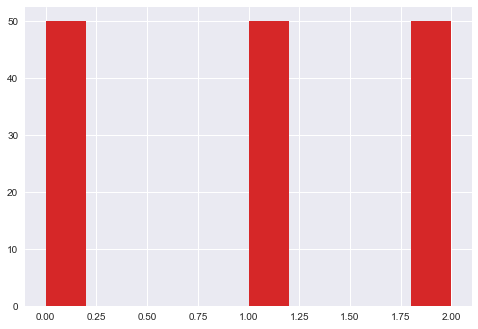

In [335]:
plt.hist(Y1,color='tab:red')
plt.show()

In [308]:
neu_max=5
neu=range(1,neu_max+1)

### Dos capas: 

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y1)
ac2=[]
for i in neu:
    m2 = MLPClassifier(activation='relu',  hidden_layer_sizes=(i, i), solver='adam', learning_rate_init=0.1)
    m2.fit(X_train,Y_train)
    Y_pred = m2.predict(X_test)
    ac2.append(accuracy_score(Y_pred,Y_test))


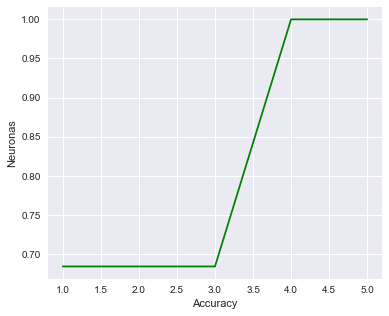

In [344]:
fig2= plt.figure(figsize=(6,5))
plt.plot(neu,ac2,label='Dos capas',color='green')

plt.xlabel('Accuracy')
plt.ylabel('Neuronas')
plt.show()

Tres capas:

In [324]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y1)
ac3=[]
for i in neu:
    m3 = MLPClassifier(activation='relu',  hidden_layer_sizes=(i,i,i), solver='adam', learning_rate_init=0.1)
    m3.fit(X_train,Y_train)
    Y_pred3 = m3.predict(X_test3)
    ac3.append(accuracy_score(Y_pred3,Y_test3))


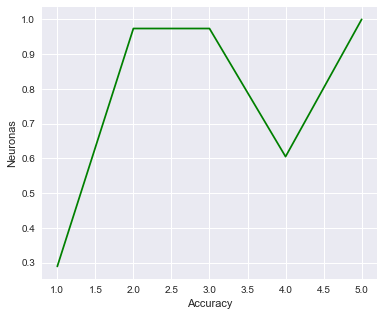

In [345]:
fig3= plt.figure(figsize=(6,5))
plt.plot(neu,ac3,label='Tres capas',color='green')

plt.xlabel('Accuracy')
plt.ylabel('Neuronas')
plt.show()

Se evidencia entonces como la convergencia se genera con menor cantidad de neuronas en el mode de tres capas

El código se basa en los ejemplos de los notebook presentados en clase:
Se pueden encontrar en https://github.com/ComputoCienciasUniandes/IntroDeepLearning_202102